In this notebook we'll discuss using sparse autoencoders in order to reduce the dimensionality of and normalize cross-platform data.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

from urllib import urlretrieve
import cPickle as pickle
import os
import glob
import sys
import gzip

import numpy as np
import theano

import codecs
import csv
import xlrd

In [21]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [22]:
array = list( csv.reader( open( 'miRNA_data.csv', 'rb' ) ) )

In [23]:
arr = np.array(array)

In [24]:
x, y = arr.shape
arr = arr[1:x, 1:y]

In [25]:
arr = arr.astype(np.float32)
arr = np.swapaxes(arr, 0, 1)
arr.shape

(5229, 470)

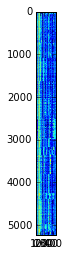

In [26]:
plt.imshow(arr)
plt.show()

In [27]:
from keras.layers import containers, AutoEncoder, Dense, Dropout
from keras.layers.noise import GaussianNoise
from keras import models

# input shape: (nb_samples, 32)
encoder = containers.Sequential([Dense(256, input_dim=470), GaussianNoise(0.3), Dropout(0.5), Dense(2)])
decoder = containers.Sequential([Dense(256, input_dim=2), Dense(470)])

autoencoder = AutoEncoder(encoder=encoder, decoder=decoder, output_reconstruction=True)
model = models.Sequential()
model.add(autoencoder)

# compiling the autoencoder:
model.compile(optimizer='adadelta', loss='mse')

In [28]:
model.fit(arr, arr, nb_epoch=20)

Epoch 1/20
5229/5229 [==============================] - 1s - loss: 41.5853     
Epoch 2/20
5229/5229 [==============================] - 1s - loss: 8.4169     
Epoch 3/20
5229/5229 [==============================] - 1s - loss: 38.1198     
Epoch 4/20
5229/5229 [==============================] - 1s - loss: 7.8167     
Epoch 5/20
5229/5229 [==============================] - 0s - loss: 9.8549     
Epoch 6/20
5229/5229 [==============================] - 1s - loss: 9.4722     
Epoch 7/20
5229/5229 [==============================] - 1s - loss: 21.6120     
Epoch 8/20
5229/5229 [==============================] - 0s - loss: 9.3607     
Epoch 9/20
5229/5229 [==============================] - 1s - loss: 8.1590     
Epoch 10/20
5229/5229 [==============================] - 1s - loss: 9.4245     
Epoch 11/20
5229/5229 [==============================] - 1s - loss: 9.7999     
Epoch 12/20
5229/5229 [==============================] - 0s - loss: 10.0964     
Epoch 13/20
5229/5229 [======================

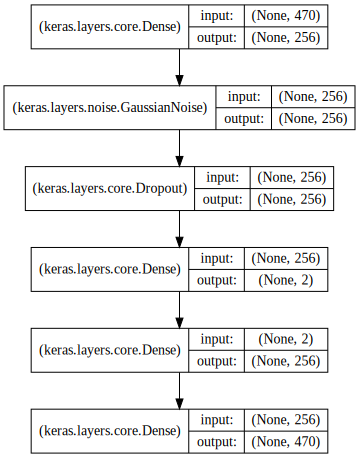

In [30]:
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.visualize_util import to_graph



from keras.utils.visualize_util import plot
SVG(to_graph(encoder, show_shape = True).create(prog='dot', format='svg'))
SVG(to_graph(decoder, show_shape = True).create(prog='dot', format='svg'))

In [31]:
autoencoder.output_reconstruction = False
model.compile(optimizer='adadelta', loss='mse')

In [36]:
representations = np.array(model.predict(arr))

In [37]:
representations

array([[ -29.84323311,  160.86108398],
       [ -92.44696045,  129.32785034],
       [ -25.99291801,  157.39579773],
       ..., 
       [ -88.79647827,   78.55767059],
       [ -81.76464081,  115.11628723],
       [ -85.94992828,  105.83365631]])

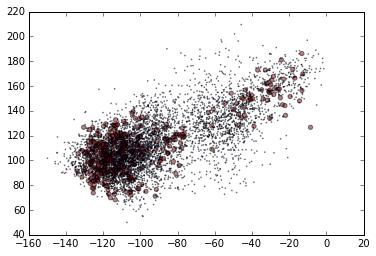

In [57]:
colors = np.append(np.ones(400), np.zeros(5229 - 400))
colors = np.multiply(colors, 50)
colors = np.add(colors, 10)
sizes = np.multiply(colors, colors)
sizes = np.divide(sizes, 200)
plt.scatter(representations[:, 0], representations[:, 1], s = sizes, alpha=0.5, c = colors)
